In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
df=pd.read_csv('diabetes.csv')

In [63]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
df.columns=df.columns.str.lower()

In [60]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [62]:
df["pregnancies"].value_counts()

,count
pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [64]:
x=df.drop("outcome",axis=1)
y=df["outcome"]

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
scaler=StandardScaler()

In [67]:
x_train=scaler.fit_transform(x_train)

In [68]:
x_test=scaler.transform(x_test)

In [69]:
param_grid={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[2,3,4,5],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2,5],
    'max_features':['auto', 'sqrt', 'log2']
}

In [72]:
param_grid=dict(param_grid)

In [70]:
model=DecisionTreeClassifier()

In [73]:
grid=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

In [74]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
grid.best_score_

np.float64(0.7557377049180327)

In [76]:
grid.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                       min_samples_split=5)

In [77]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [83]:
model2=DecisionTreeClassifier(
 criterion= "log_loss",
 max_depth= 4,
 max_features= "log2",
 min_samples_leaf= 1,
 min_samples_split= 5,
 splitter= "best"
)

In [84]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                       min_samples_split=5)

[Text(0.4125, 0.9, 'x[5] <= -0.302\nlog_loss = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.15, 0.7, 'x[1] <= -0.511\nlog_loss = 0.597\nsamples = 228\nvalue = [195, 33]'),
 Text(0.28125, 0.8, 'True  '),
 Text(0.1, 0.5, 'log_loss = 0.0\nsamples = 88\nvalue = [88, 0]'),
 Text(0.2, 0.5, 'x[0] <= 0.531\nlog_loss = 0.788\nsamples = 140\nvalue = [107, 33]'),
 Text(0.1, 0.3, 'x[6] <= -0.761\nlog_loss = 0.633\nsamples = 94\nvalue = [79, 15]'),
 Text(0.05, 0.1, 'log_loss = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.15, 0.1, 'log_loss = 0.755\nsamples = 69\nvalue = [54, 15]'),
 Text(0.3, 0.3, 'x[2] <= -1.212\nlog_loss = 0.966\nsamples = 46\nvalue = [28, 18]'),
 Text(0.25, 0.1, 'log_loss = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.35, 0.1, 'log_loss = 0.981\nsamples = 43\nvalue = [25, 18]'),
 Text(0.675, 0.7, 'x[7] <= -0.209\nlog_loss = 0.997\nsamples = 386\nvalue = [206, 180]'),
 Text(0.54375, 0.8, '  False'),
 Text(0.55, 0.5, 'x[6] <= 1.998\nlog_loss = 0.9\nsamples = 196\nvalue = [1

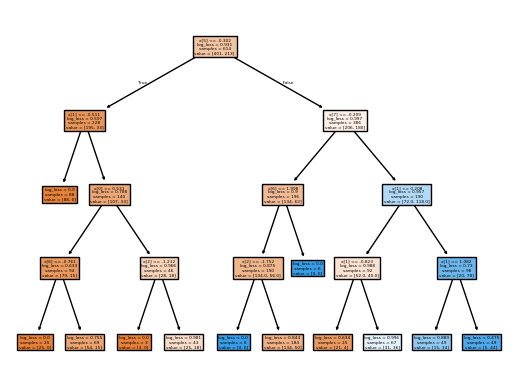

In [85]:
tree.plot_tree(model2,filled=True)

In [86]:
y_pred=model2.predict(x_test)

In [87]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")

Accuracy Score: 0.7012987012987013
Confusion Matrix: 
[[76 23]
 [23 32]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        99
           1       0.58      0.58      0.58        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



<Axes: >

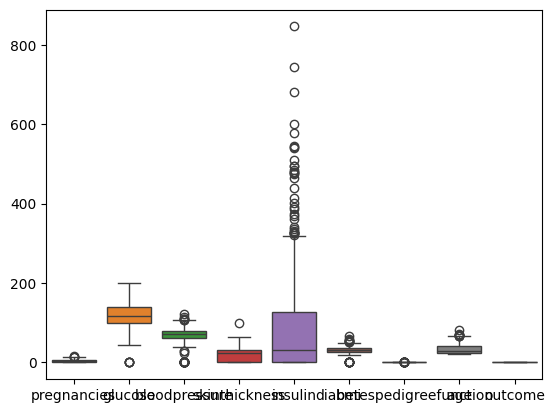

In [88]:
snb.boxplot(df)

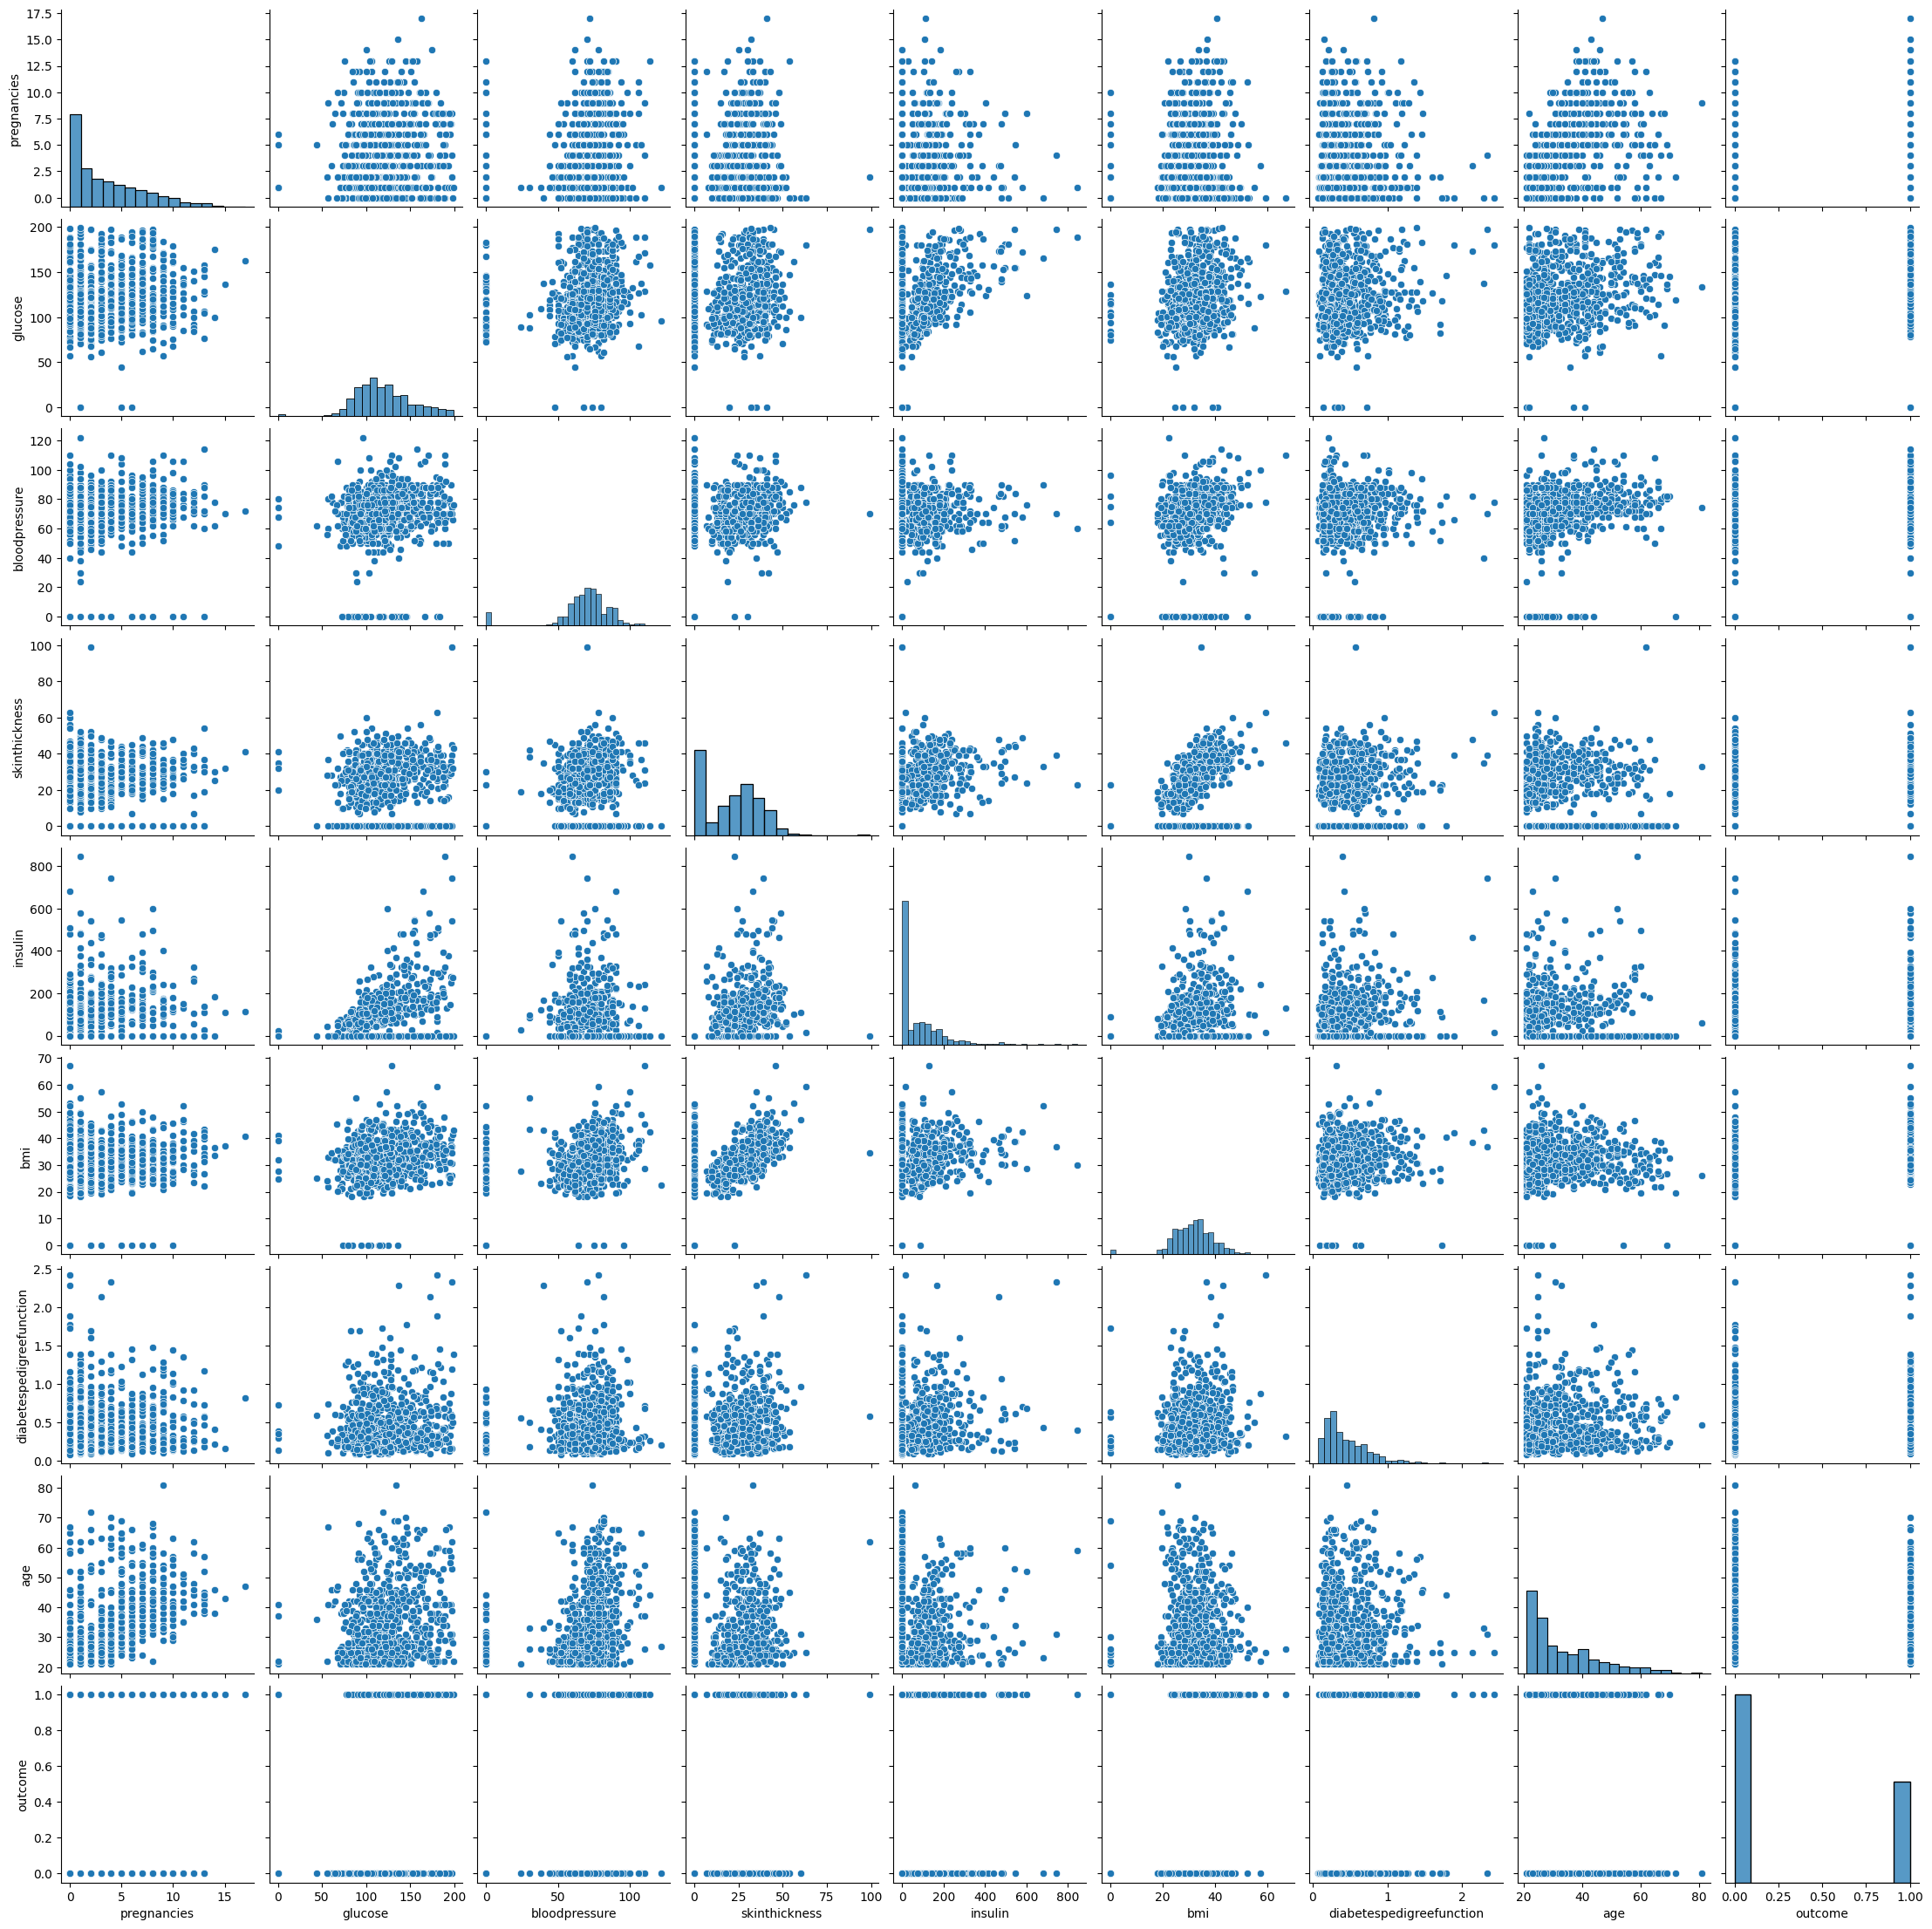

In [89]:
snb.pairplot(df)

<Axes: >

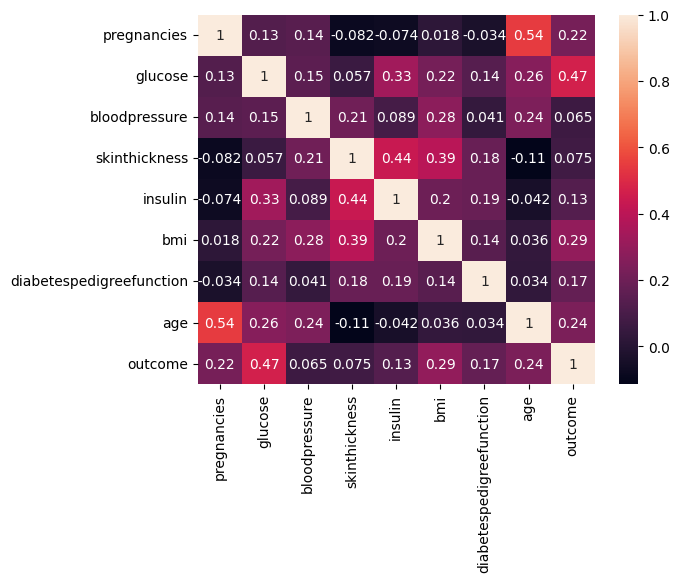

In [91]:
snb.heatmap(df.corr(),annot=True)